# 多層感知器MLP辨識手寫數字 (以Tensorflow)

<img style="float: right;" src="images/1.jpg" width="100%">jkjkjk

### 多層感知器的訓練與預測
![1.jpg](images/1.jpg)
訓練：<br>
訓練集資料經過資料預處理後會產生Features(數字影像特徵值)與Label(數字的真實值)<br>
然後輸入多層感知器模型進行訓練，訓練完成的模型就可以做為下一階段預測使用<br>
預測：<br>
輸入數字影像，預處理後會產生Featurs(數字影像轉換為特徵)，使用訓練完成的多層感知器模型進行預測，最後產生預測結果。

### 以多層感知器模型辨識Mnist手寫數字影像
![2.jpg](images/2.jpg)

### 以矩陣公式模擬多層感知器模型運作
![3.jpg](images/3.jpg)

### 多層感知器模型的建立步驟

## 1.資料預處理<br>
資料預處理後，會產生Features(數字影像特徵值)與Label(數字的真實值)
## 2.建立模型<br>
我們將建立多層感知器模型。輸入層(x)共有784神經元，隱藏層(h)共有256，輸出層(y)共有10個神經元
## 3.訓練模型<br>
輸入訓練資料features數字影像的特徵值與label數字影像的真實值。執行15次訓練週期，每一批次100筆資料
## 4.評估模型準確率<br>
使用測試資料，評估模型準確率
## 5.進行預測<br>
使用已訓練完成的模型，輸入測試資料進行預測

# 資料準備
## 匯入TensorFlow模組 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

## 匯入TensorFlow讀取MNIST資料集模組

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

## 讀取mnist資料(第一次執行會下載)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


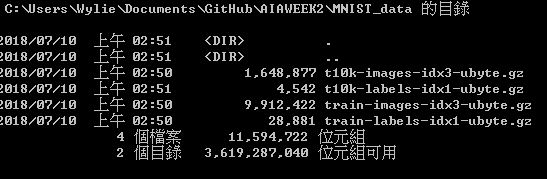<br>
mnist資料檔案及下載至Mnist_data資料夾裡

# 再次讀取mnist資料(已下載完畢，所以會直接讀取)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print('訓練資料',mnist.train.num_examples,'筆')
print('驗證資料',mnist.validation.num_examples,'筆')
print('測試資料',mnist.test.num_examples,'筆')

訓練資料 55000 筆
驗證資料 5000 筆
測試資料 10000 筆


# 查看訓練資料

In [6]:
print('train images      :', mnist.train.images.shape) 
print('train labels      :', mnist.train.labels.shape)

train images      : (55000, 784)
train labels      : (55000, 10)


![4.jpg](images/4.jpg)

### 上方為images及labels的shape圖解

In [7]:
#由len函數查看第1筆images的資料，可以看到共784個數字
len(mnist.train.images[1])

784

In [8]:
#查看第0筆的images影像的內容，共784個數字
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##### TensorFlow已經進行標準化，數值都是介於0~1之間，所以不用再做標準化

# 資料預處理

### 以plot來顯示影像

In [9]:
#匯入matplotlib.pyplot模組，後續已plt做引用
import matplotlib.pyplot as plt
#定義plot_image 傳入image作為參數
def plot_image(image):
#使用plt.imshow顯示圖形，傳入參數image原本是784個點，必須先使用reshape轉換為28x28的圖形(28x28=784)，cmap參數設定為binary
#cmap = colormap https://matplotlib.org/examples/color/colormaps_reference.html
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

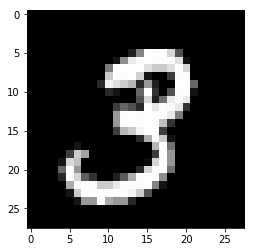

In [10]:
plot_image(mnist.train.images[1]) #查看測試集的第1筆資料，根據顯示結果可知其為3的圖形

# 查看訓練標籤labels資料

在上述讀取資料集時，我們指定參數one_hot是True。所以產生的labels是One-hot Encoding格式。<br>
而使用One-hot Encoding的原因是，後續要建立類神經網路的輸出層，輸出層共10個神經元y0~y9分別對應至0~9<br>
而其格式為1與0的數字所組成，只有一個數字是1其餘都是0。<br>
例如：<br>
1,0,0,0,0,0,0,0,0,0 代表0<br>
0,1,0,0,0,0,0,0,0,0 代表1<br>
0,0,1,0,0,0,0,0,0,0 代表2<br>
以此類推...

In [11]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## 使用argmax顯示數字
若以one-hot Encoding格式，閱讀起來較不方便，所以我們使用np.argmax轉換為0~9的數字，以便觀看。

In [12]:
import numpy as np
np.argmax(mnist.train.labels[1]) #將第1筆資料做轉換後，可得為3

3

# 查看多筆訓練資料images與labels

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                 prediction,idx,num=10): #image(數字影響)，labels(真實值)，prediction(預測結果)，idx(開始顯示的資料index)，num(要顯示的資料筆數，預設是10，不超過25)
    
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 #如果顯示筆數參數>25 num就等於25，以免發生錯誤
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        
        ax.imshow(np.reshape(images[idx],(28, 28)),
                 cmap='binary') #畫出subgraph子圖形且將image用reshape轉換為二維28x28影像，才能顯示圖形
        
        title= "label=" +str(np.argmax(labels[idx])) #設定子圖形title，顯示標籤欄位且用np.argmax將原本是One-hot Encoding格式顯示的label轉為數字，才能顯示0~9。
        if len(prediction)>0: #如果有傳入預測結果
            title+=",predict="+str(prediction[idx]) #在title加入預測結果
            
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]);ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()

# 查看訓練、驗證、測試集的前10筆資料

訓練資料 images: (55000, 784)
訓練資料 labels: (55000, 10)


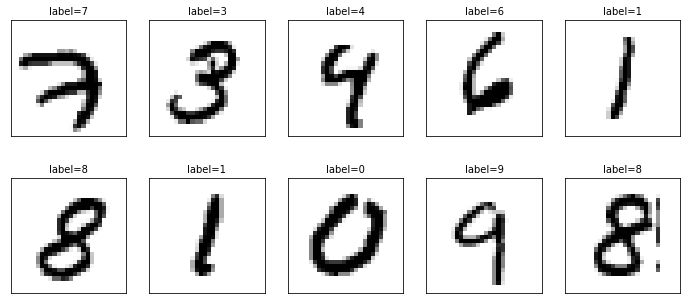

In [14]:
print('訓練資料 images:', mnist.train.images.shape)
print('訓練資料 labels:', mnist.train.labels.shape)
plot_images_labels_prediction(mnist.train.images,
                              mnist.train.labels,[],0)

驗證資料 images: (5000, 784)
驗證資料 labels: (5000, 10)


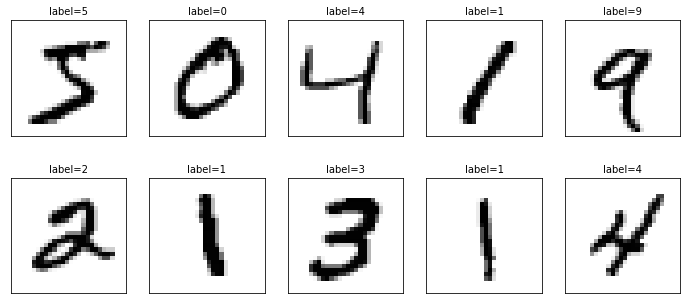

In [15]:
print('驗證資料 images:', mnist.validation.images.shape)
print('驗證資料 labels:', mnist.validation.labels.shape)
plot_images_labels_prediction(mnist.validation.images,
                              mnist.validation.labels,[],0)

測試資料 images: (5000, 784)
測試資料 labels: (5000, 10)


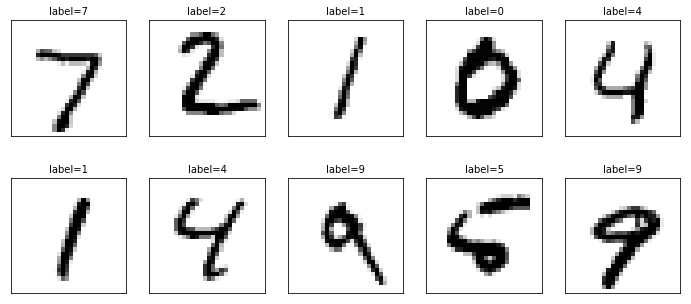

In [16]:
print('測試資料 images:', mnist.validation.images.shape)
print('測試資料 labels:', mnist.validation.labels.shape)
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,[],0)

# 建立模型


### 建立layer函數

In [17]:
#定義layer函數參數
def layer(output_dim,input_dim,inputs, activation=None): #output_dim : 輸出的神經元數量 、 input_dim：輸入的神經元數量 、 input：輸入的二維陣列placeholder、activation：傳入激活函數，預設是None
    #以常態分佈的亂數，建立並初始化W權重(weight)
    W = tf.Variable(tf.random_normal([input_dim, output_dim])) #以tf.random_normal函數傳入[input_dim,output_dim]參數，就可以產生維度是(input_dim,output_dim)的常態分佈的亂數矩陣
    #以常態分佈的亂數，建立並且b偏差(bias)
    b = tf.Variable(tf.random_normal([1, output_dim]))#以tf.random_normal函數傳入[1,output_dim]參數，就可以產生維度是(1,output_dim)的常態分佈的亂數矩陣
    #建立矩陣運算式 XWb = (inputs*W) + b
    XWb = tf.matmul(inputs, W) + b
    #設定activation激活函數，判斷如果輸入參數activation是None，就不使用激活函數，如果有傳入，就會使用傳入的激活函數進行轉換。
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    #回傳已建立的神經網路層
    return outputs

### 建立輸入層x

In [18]:
x = tf.placeholder("float", [None, 784])

#### 以上tf.placeholder方法建立輸入層後會回傳，x輸入層可做為下一層的輸入。
資料型態：float<br>
[None, 784]：<br>
第1維度：設定為None，因為後續訓練時會傳送很多數字影響，筆數不固定，所以設定為None<br>
第2維度：設定為784，因為輸入的數字影像像素是784點<br>

placeholder是Tensorflow中的佔位符，暫時儲存變量，後續在訓練時，會傳入數字影像資料<br>
莫煩python-placeholder傳入值 : https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/2-5-placeholde/

### 建立隱藏層h1 

#### 共建立兩次隱藏層及更改兩次神經元，第一次：256神經元、第二次：1000神經元

In [19]:
h1=layer(output_dim=1000,input_dim=784,
        inputs=x ,activation=tf.nn.relu)

### 建立隱藏層h2 

In [20]:
h2=layer(output_dim=1000,input_dim=784,
        inputs=x ,activation=tf.nn.relu)

#### 以上layer函數執行後會回傳：h1隱藏層可做為下一層的輸入

output_dim=256：建立256個隱藏層神經元<br>
input_dim=784：x(輸入層)的神經元個數，也就是數字影像像素784<br>
iuputs=x：x(輸入層)<br>
activation=tf.nn.relu：定義激活函數tf.nn.relu

### 建立輸出層y

In [21]:
y_predict=layer(output_dim=10,input_dim=1000,
               inputs=h1,activation=None)

output_dim=10：建立輸出層神經元個數10<br>
input_dim=256：h1(隱藏層)的神經元個數，也就是256<br>
inputs=h1：h1(隱藏層)<br>
activation=None：不須激活函數<br>
回傳y_predict：預測結果

# 定義訓練方式
### Step1. 建立訓練資料label真實值得placeholder

In [22]:
y_label = tf.placeholder("float", [None, 10])

資料型態：float<br>
[None, 10] ：<br>
第1維度：設定為None，因為後續我們訓練時會傳送很多數字影像，筆數不固定，所以設為None<br>
第2維度：設定為10，因為輸入的數字真實值已經使用Onehot encoding轉換，共有10個0或1，對應到0~9數字。

placeholder後續在訓練時，會傳入數字的label真實值<br>
### Step2. 定義loss function

In [23]:
loss_function = tf.reduce_mean(                            #將下列cross_entropy計算結果平均
                  tf.nn.softmax_cross_entropy_with_logits  #計算cross_entropy數入下列參數：
                         (logits=y_predict ,               #logits參數設定為y_predict預測值
                          labels=y_label))                 #labels參數設定為y_label真實值

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Step3. 定義optimizer最優化方法

In [24]:
#呼叫tf.train模組定義optimizer且使用AdamOptimizer並設定learning_rate=0.0001
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)              #Optimizer使用loss_function計算loss(誤差)，並且依照loss更新模型權重(Weight)與偏差(Bias)，使loss最小化

# 定義評估模型的準確率方式
### Step1. 計算每一筆資料是否預測正確

In [25]:
#將運算結果儲存在correct_prediction
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

tf.equal( ：以tf.equal判斷下列（真實值）與（預測值）是否相等，如果相等傳回1，不相等傳回0<br>
tf.argmax(y_label, 1),：真實值因為是Onehot Encoing，使用tf.argmax轉換為數字0~9。例如原本Onehot encoing：0,0,1,0,0,0,0,0,0,0轉換為2<br>
tf.argmax(y_predict, 1))：預測值因為是Onehot Encoing，使用tf.argmax轉換為數字0~9<br>
### Step2. 將計算預測正確結果平均

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) #correct_prediction先使用tf.cast轉換為"float"，再使用tf.reduce_mean將所有數值平均

# 進行訓練

訓練資料共55000筆，分為每一批次100筆，要將所有資料訓練完畢。須執行(55000/100)=550批次，當所有資料訓練完畢，我們稱為一個epoch<br>
共將執行15次epoch，盡量使誤差降低，並盡量讓準確率提高。下列為訓練流程圖：<br>
![5.jpg](images/5.jpg)

In [27]:
trainEpochs = 15                                      #設定執行15次訓練週期
batchSize = 100                                       #每一批次筆數100
totalBatchs = int(mnist.train.num_examples/batchSize) #計算每次訓練週期，(所需執行批次550)=(訓練資料筆數55000)/(每一批次筆數 100)
loss_list=[];epoch_list=[];accuracy_list=[]           #起始化epoch_list(訓練週期)、loss_list(誤差)、acc_list(準確率)，後續每一次訓練週期完成後，會記錄誤差與準確率。在下一步驟會以圖形顯示。
from time import time                                 #匯入時間模組
startTime=time()                                      #開始計算時間

sess = tf.Session()                                   #建立 TensorFlow session
sess.run(tf.global_variables_initializer())           #起始化TensorFlow global變數

### Step2. 進行訓練

In [28]:
for epoch in range(trainEpochs):                                      #trainEpochs=15，所以執行15次的epoch訓練週期
    for i in range(totalBatchs):                                      #每一個epoch訓練週期，執行550批次訓練
        batch_x, batch_y = mnist.train.next_batch(batchSize)          #mnist.train.next_batch方法，傳入參數batchSize是100，每批次會讀取100筆資料，執行後回傳
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})   #batch_x 數字影像(特徵值)共100筆，batch_y數字影像(真實值)共100筆
                                                                      #使用sess.run執行optimizer(最優化方法)，透過feed_dict傳送資料給2個placeholder，
                                                                      #分別是： x placeholder：傳入batch_x。  y_label placeholder：傳入batch_y。
                                                                      #opyimizer(最優化方法)依照誤差值，更新神經元連結的權重(Weight)與偏差(bias)，盡量使損失函數的誤差值最小化。
#使用驗證資料計算準確率                    
    loss,acc = sess.run([loss_function,accuracy],                     #使用sess.run([loss_function,accuracy],計算準確率，並且透過feed_dict傳送資料給2個placeholder，分別是：
                        feed_dict={x: mnist.validation.images,        #x: mnist.validation.images：驗證資料的數字影像(特徵值)。 y_label: mnist.validation.labels：驗證資料的數字影像（真實值）。
                                   y_label: mnist.validation.labels}) #執行後會回傳loss(誤差)、acc（準確率）
#將訓練結果顯示，並存入list作為後續顯示圖表使用
    epoch_list.append(epoch);loss_list.append(loss)                   #epoch_list.append(epoch)：加入訓練週期loss_list.append(loss)：加入誤差list，
    accuracy_list.append(acc)                                         #accuracy_list.append(acc)：加入準確率list，這些list後續可顯示圖表。
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)               #另外print出此訓練週期結果
#15次epoch訓練週期後，計算並顯示全部訓練所需時間
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 9.272762299  Accuracy= 0.8862
Train Epoch: 02 Loss= 6.190370083  Accuracy= 0.9154
Train Epoch: 03 Loss= 5.072082996  Accuracy= 0.9264
Train Epoch: 04 Loss= 4.400986195  Accuracy= 0.9322
Train Epoch: 05 Loss= 3.730928898  Accuracy= 0.9384
Train Epoch: 06 Loss= 3.314639091  Accuracy= 0.9448
Train Epoch: 07 Loss= 3.015968323  Accuracy= 0.9502
Train Epoch: 08 Loss= 3.120480537  Accuracy= 0.948
Train Epoch: 09 Loss= 2.854065180  Accuracy= 0.952
Train Epoch: 10 Loss= 2.793143272  Accuracy= 0.9542
Train Epoch: 11 Loss= 2.744397640  Accuracy= 0.9558
Train Epoch: 12 Loss= 2.920720816  Accuracy= 0.9524
Train Epoch: 13 Loss= 2.717517853  Accuracy= 0.9544
Train Epoch: 14 Loss= 2.532316923  Accuracy= 0.961
Train Epoch: 15 Loss= 2.474773407  Accuracy= 0.9626
Train Finished takes: 70.89128589630127


根據上述結果顯示，可以看到共執行15個Epoch訓練執行時期，Loss誤差越來越小，準確率越來越高<br>
### Step3. 畫出loss誤差執行結果

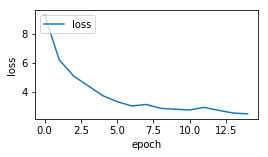

In [29]:
#設定matplotlib在jupyter note頁面顯示徒刑，如果少了這一指令，則會另開視窗顯示圖形
%matplotlib inline
fig = plt.gcf()                                    #取得當前的figure圖
fig.set_size_inches(4,2)                           #設定圖的大小
plt.plot(epoch_list, loss_list, label = 'loss')    #使用plt.plot繪圖，x軸資料為epoch_list(訓練週期list)，y軸為loss_list(誤差list)，設定線的標籤式'loss'
plt.ylabel('loss')                                 #y軸標籤是'loss'
plt.xlabel('epoch')                                #x軸標籤是'epoch'
plt.legend(['loss'], loc='upper left')             #設定圖例是顯示'loss'，位置在右上角

### Step4. 畫出accuracy執行結果

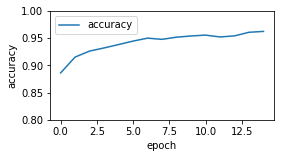

In [30]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)               #設定y軸顯示範圍，比較能顯示Y軸的範圍
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 評估模型準確率

In [31]:
print("Accuracy:", sess.run(accuracy,                               #利用sess.run(accuracy,計算準確率，並使用feed_dict傳送資料給以下2個placeholder)
                           feed_dict={x: mnist.test.images,         #測試資料的數字影像
                                      y_label: mnist.test.labels})) #測試資料的數字真實值

Accuracy: 0.9604


# 進行預測
### Step1. 執行預測

In [32]:
prediction_result=sess.run(tf.argmax(y_predict,1),            #利用(tf.argmax(y_predict,1) 執行預測，因為y_predict預測結果是Onehot Encoding，所以必須使用tf.argmax轉換為0~9的數字。執行時必須以fee_dict傳送資料給以下placeholder
                           feed_dict={x: mnist.test.images }) # x: mnist.test.images 測試資料的數字影像

### Step2. 預測結果

In [33]:
prediction_result[:10] #查看預測結果的前十筆資料

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

### Step3. 顯示前10筆預測結果

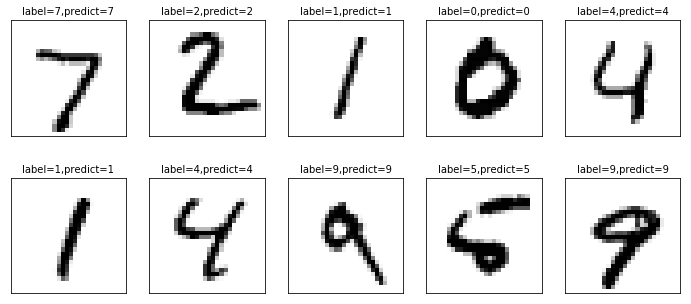

In [34]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

我們總共預測了三次結果的資料<br>
#### 第一次為隱藏層神經元為256個。<br>
得到的結果為：0.9425<br>
![6.JPG](images/6.JPG)
![7.JPG](images/7.JPG)

#### 第二次為隱藏層神經元為1000個 <br>
得到的結果為：0.9583
![8.JPG](images/8.JPG)
![9.JPG](images/9.JPG)

#### 第三次為新增第二個隱藏層，且神經元均為1000個<br>
得到的結果為:0.9602
![10.JPG](images/10.JPG)
![11.JPG](images/11.JPG)

比起第一、二次的預測結果，都稍微上升了一點準確率，不過多層感知器有其極限，如果還要進一步提升準確率，就必須使用網路卷積神經網路CNN<br>
<br>
參考圖文、書籍：<br>
TensorFlow+Keras深度學習人工智慧實務應用-林大貴 http://tensorflowkeras.blogspot.com/<br>
莫煩Python https://morvanzhou.github.io/<br>
小狐狸事務所 http://yhhuang1966.blogspot.com/2018/03/keras-mlp.html